Importing our required libraries

In [170]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading our image and converting to grayscale

In [171]:
path = 'C:\Danyal\Work\FAST\Semester 5\Digital Image Processing\Assignment # 2\Q-2.jpg'
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img_colour = cv2.imread(path)



Applying Canny Edge Detector on the image

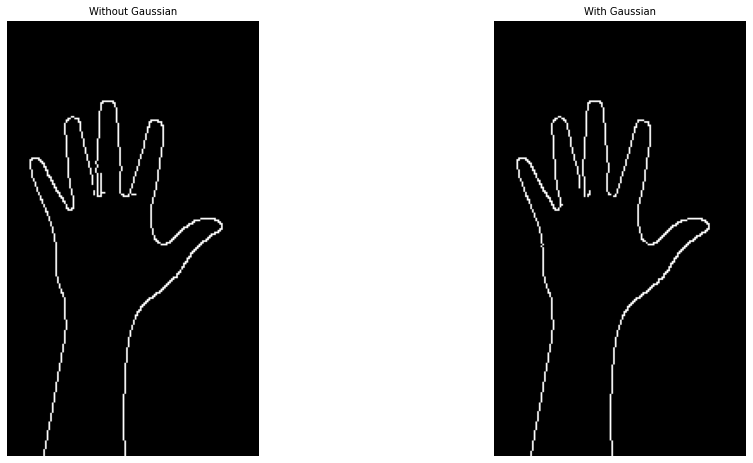

In [172]:
#Applying Gaussian Blur with 3x3 before Applying Canny
blur = cv2.GaussianBlur(img, (3,3), 0) 
# Applying Canny with and without Gaussian blur to check effect
edgesCanny = cv2.Canny(img, threshold1=100, threshold2=200) 
edgesCanny1 = cv2.Canny(blur, threshold1=110, threshold2=180) 

#Thresholding the image to convert into binary
threshold, imga1 = cv2.threshold(edgesCanny1, 80, 255, cv2.THRESH_BINARY)

#Displaying the image
fig, axs = plt.subplots(1,2,figsize=(16,8))

axs[0].imshow(edgesCanny,cmap='gray')
axs[0].axis('off')
axs[0].set_title('Without Gaussian',fontsize='medium')

axs[1].imshow(imga1,cmap='gray')
axs[1].axis('off')
axs[1].set_title('With Gaussian',fontsize='medium')
plt.show()

Now superimposing the edges onto the original colour image

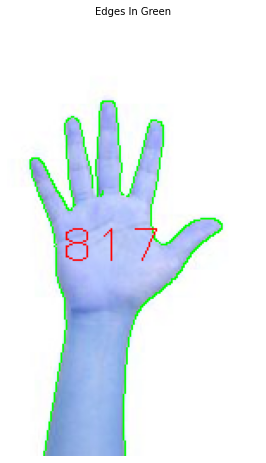

In [173]:
#Function to make pixel green on edges
def draw():
    counter = 0
    for x in imga1:
        count = 0
        for y in x:
            if y > 200:
                #If pixel is white in canny edges, change colour to green to signify edge
                img_colour[counter][count] = (0,255,0)
            count += 1
        counter += 1 
draw()

#Writing the count of edge pixels as they are perimeter onto image
cv2.putText(img_colour,str(cv2.countNonZero(imga1)), (30,140), 1, 2, 255)

#Displaying image
plt.figure(figsize=(16, 8))
plt.imshow(img_colour)
plt.axis('off')
plt.title('Edges In Green',fontsize='medium')
plt.show()

cv2.imshow('img',img_colour)
cv2.waitKey(0)
cv2.destroyAllWindows()